In [1]:
import pandas as pd
import geopandas as gpd
import warnings

%config InlineBackend.figure_format = 'retina'

#reading in shapefile of durham county police beats
beats = gpd.read_file("/Users/morganbernstein/Desktop/Data+/filtered_beats/filtered_beats.shp")

#reading in csv files of the clean data and one with the longitude and latitude coordinates
#clean02 = pd.read_csv("/Users/clarissaache/Documents/Data+/SToPAGetDurhamData/10 Clean Data/clean02.csv")
#long_lat = pd.read_csv("/Users/clarissaache/Documents/Data+/SToPAGetDurhamData/30 Spatial Mapping/latitude_longitude.csv")
full = pd.read_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/10 Clean Data/with_beats.csv", low_memory=False)

In [2]:
full.loc[full["race"] == "O", "race"] = "U"


Text(0.5, 1.0, 'Arrests by Durham County Police Department Oct-2018 to June-2022')

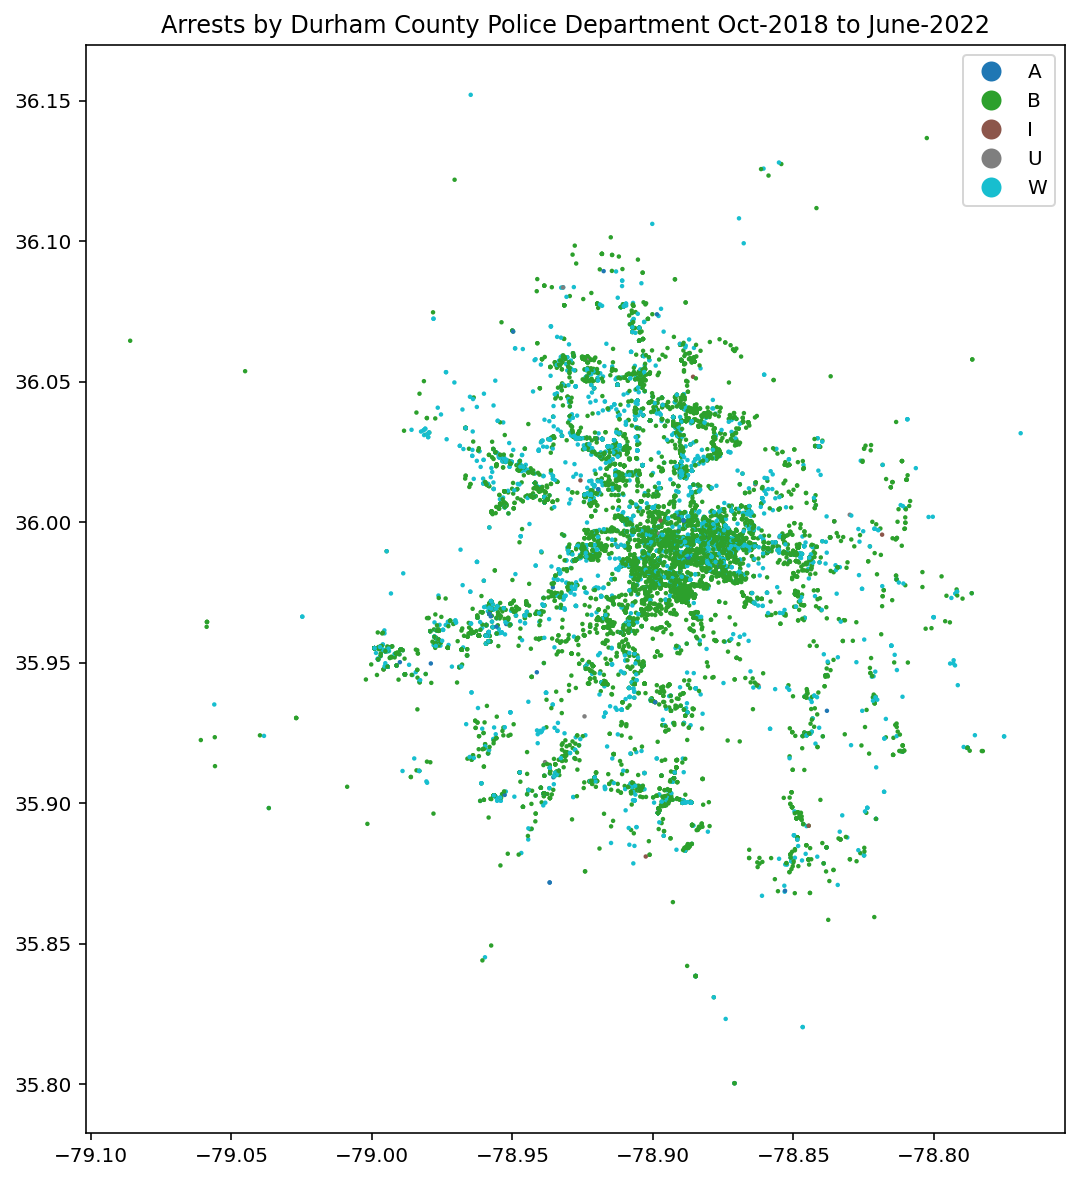

In [3]:
# convert into geo pandas df
geodata = gpd.GeoDataFrame(
    full, geometry=gpd.points_from_xy(full.longitude, full.latitude)
)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geodata.plot(
    ax=ax, legend=True, edgecolor="white", markersize=5, linewidth=0, column="race"
)
plt.title("Arrests by Durham County Police Department Oct-2018 to June-2022")


In [4]:
full["placeconfined"].value_counts()


DCJ                    7702
DURHAM COUNTY JAIL     2446
CITATION                623
DURHAM COUNTY           481
DURHAM CO JAIL          410
                       ... 
E MAIN ST/S ELM ST        1
DURHMCOUNTY JAIL          1
502 W LAKEWOOD AVE.       1
UNIVSERSITY/KENT          1
TRAFFIC COURT             1
Name: placeconfined, Length: 259, dtype: int64

In [5]:
# important columns
columns = [
    "arrestingofficer",
    "arrestnumber",
    "name",
    "age",
    "race",
    "sex",
    "citizenship",
    "casenumber",
    "skintone",
    "armed",
    "typeofarrest",
    "bondtype",
    "bondamount",
    "dates",
    "time",
    "year",
    "geometry",
]


In [6]:
# Obatin the arrests on each beat
arrests_per_beat = beats.sjoin_nearest(
    geodata[columns],
    distance_col="distance",
)
arrests_per_beat.shape


/Users/morganbernstein/opt/anaconda3/envs/geo/lib/python3.10/site-packages/geopandas/geodataframe.py:2184: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin_nearest(
/Users/morganbernstein/opt/anaconda3/envs/geo/lib/python3.10/site-packages/geopandas/array.py:340: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


(17028, 29)

In [7]:
arrests_per_beat["Black"] = 0
arrests_per_beat.loc[arrests_per_beat["race"] == "B", "Black"] = 1

arrests_per_beat["White"] = 0
arrests_per_beat.loc[arrests_per_beat["race"] == "W", "White"] = 1

arrests_per_beat["Asian"] = 0
arrests_per_beat.loc[arrests_per_beat["race"] == "A", "Asian"] = 1

arrests_per_beat["Unknown"] = 0
arrests_per_beat.loc[arrests_per_beat["race"] == "U", "Unknown"] = 1

arrests_per_beat["Indigenous"] = 0
arrests_per_beat.loc[arrests_per_beat["race"] == "I", "Indigenous"] = 1


In [8]:
# group by beat
arrests_counts = arrests_per_beat.groupby(by="LAWBEAT", as_index=False).sum()

arrests_counts["total"] = arrests_counts[
    ["Black", "White", "Asian", "Unknown", "Indigenous"]
].sum(axis=1)
arrests_counts


,LAWBEAT,OBJECTID,PERIMETER,ShapeSTAre,ShapeSTLen,index_right,arrestnumber,age,casenumber,year,distance,Black,White,Asian,Unknown,Indigenous,total
0,111,25300,1.447605e+07,1.017188e+10,1.447605e+07,6932453,161251565,17640,10100612646,1022141,0.000000,437,64,5,0,0,506
1,112,35292,1.817597e+07,1.439314e+10,1.817597e+07,8205390,220195843,24389,13759026946,1397815,0.000000,562,128,1,1,0,692
2,113,40548,1.351657e+07,1.412114e+10,1.351657e+07,6790155,208674527,22175,13113632965,1321149,0.000000,539,106,6,2,1,654
3,114,37095,3.009554e+07,3.442838e+10,3.009554e+07,3051224,181450891,19209,11401157693,1149433,0.002620,478,90,1,0,0,569
4,121,21572,1.514383e+07,1.172609e+10,1.514383e+07,7290514,169441503,20120,10730768062,1068758,0.012345,352,170,3,3,1,529
5,122,29592,2.010430e+07,1.883091e+10,2.010430e+07,7026517,174904369,18545,10996208960,1107028,0.000000,409,139,0,0,0,548
6,123,24642,3.318315e+07,3.343395e+10,3.318315e+07,3759096,142743333,13916,8934003584,904983,0.000000,353,87,1,5,2,448
7,124,6813,1.237329e+07,9.372759e+09,1.237329e+07,1167974,27890586,3051,1764836300,175774,0.026408,42,45,0,0,0,87
8,211,14436,1.473630e+07,2.601634e+10,1.473630e+07,6743617,128216700,14538,8073589856,810109,0.000000,207,190,2,1,1,401
9,212,15609,1.347739e+07,1.561318e+10,1.347739e+07,4112790,115303751,13512,7129141441,733211,0.000000,280,83,0,0,0,363


In [10]:
arrests_counts.to_csv('/Users/morganbernstein/Desktop/Data+/SToPAGetDurhamData/10 Clean Data/GROUPEDBY_BEAT.csv')

In [11]:
geo_arrest_by_race = pd.merge(
    arrests_counts, beats[["LAWBEAT", "geometry"]], on="LAWBEAT", validate="1:m"
)

geo_arrest_by_race["Black%"] = round(
    geo_arrest_by_race["Black"] / geo_arrest_by_race["total"], 2
)
geo_arrest_by_race["White%"] = round(
    geo_arrest_by_race["White"] / geo_arrest_by_race["total"], 2
)
geo_arrest_by_race["Asian%"] = round(
    geo_arrest_by_race["Asian"] / geo_arrest_by_race["total"], 2
)
geo_arrest_by_race["Indigenous%"] = round(
    geo_arrest_by_race["Indigenous"] / geo_arrest_by_race["total"], 2
)
geo_arrest_by_race["Unknown%"] = round(
    geo_arrest_by_race["Unknown"] / geo_arrest_by_race["total"], 2
)

geo_arrest_by_race["non_white%"] = geo_arrest_by_race[
    ["Black%", "Asian%", "Indigenous%", "Unknown%"]
].sum(axis=1)
geo_arrest_by_race


,LAWBEAT,OBJECTID,PERIMETER,ShapeSTAre,ShapeSTLen,index_right,arrestnumber,age,casenumber,year,...,Unknown,Indigenous,total,geometry,Black%,White%,Asian%,Indigenous%,Unknown%,non_white%
0,111,25300,1.447605e+07,1.017188e+10,1.447605e+07,6932453,161251565,17640,10100612646,1022141,...,0,0,506,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",0.86,0.13,0.01,0.00,0.0,0.87
1,112,35292,1.817597e+07,1.439314e+10,1.817597e+07,8205390,220195843,24389,13759026946,1397815,...,1,0,692,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",0.81,0.18,0.00,0.00,0.0,0.81
2,113,40548,1.351657e+07,1.412114e+10,1.351657e+07,6790155,208674527,22175,13113632965,1321149,...,2,1,654,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",0.82,0.16,0.01,0.00,0.0,0.83
3,114,37095,3.009554e+07,3.442838e+10,3.009554e+07,3051224,181450891,19209,11401157693,1149433,...,0,0,569,"POLYGON ((-78.86954 35.99292, -78.86941 35.992...",0.84,0.16,0.00,0.00,0.0,0.84
4,114,37095,3.009554e+07,3.442838e+10,3.009554e+07,3051224,181450891,19209,11401157693,1149433,...,0,0,569,"POLYGON ((-78.84601 35.96433, -78.84515 35.964...",0.84,0.16,0.00,0.00,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,423,23471,3.737526e+07,6.301266e+10,3.737527e+07,2378045,79133208,8030,5011964791,499025,...,1,1,247,"POLYGON ((-78.83470 35.94601, -78.83466 35.945...",0.70,0.28,0.01,0.00,0.0,0.71
79,423,23471,3.737526e+07,6.301266e+10,3.737527e+07,2378045,79133208,8030,5011964791,499025,...,1,1,247,"POLYGON ((-78.80564 35.93008, -78.80575 35.929...",0.70,0.28,0.01,0.00,0.0,0.71
80,511,19769,1.216540e+07,7.943573e+09,1.216540e+07,2581160,118668473,12787,7423426393,753436,...,0,2,373,"POLYGON ((-78.92318 36.01031, -78.92260 36.010...",0.74,0.25,0.00,0.01,0.0,0.75
81,512,159543,4.573255e+07,2.604473e+10,4.573255e+07,6384519,894329254,94338,55885800261,5654536,...,7,9,2799,"POLYGON ((-78.90313 36.00376, -78.90298 36.003...",0.80,0.20,0.00,0.00,0.0,0.80


Text(0.5, 1.0, 'Arrests by Durham County Police Department in LawBeats Oct-2018 to June-2022')

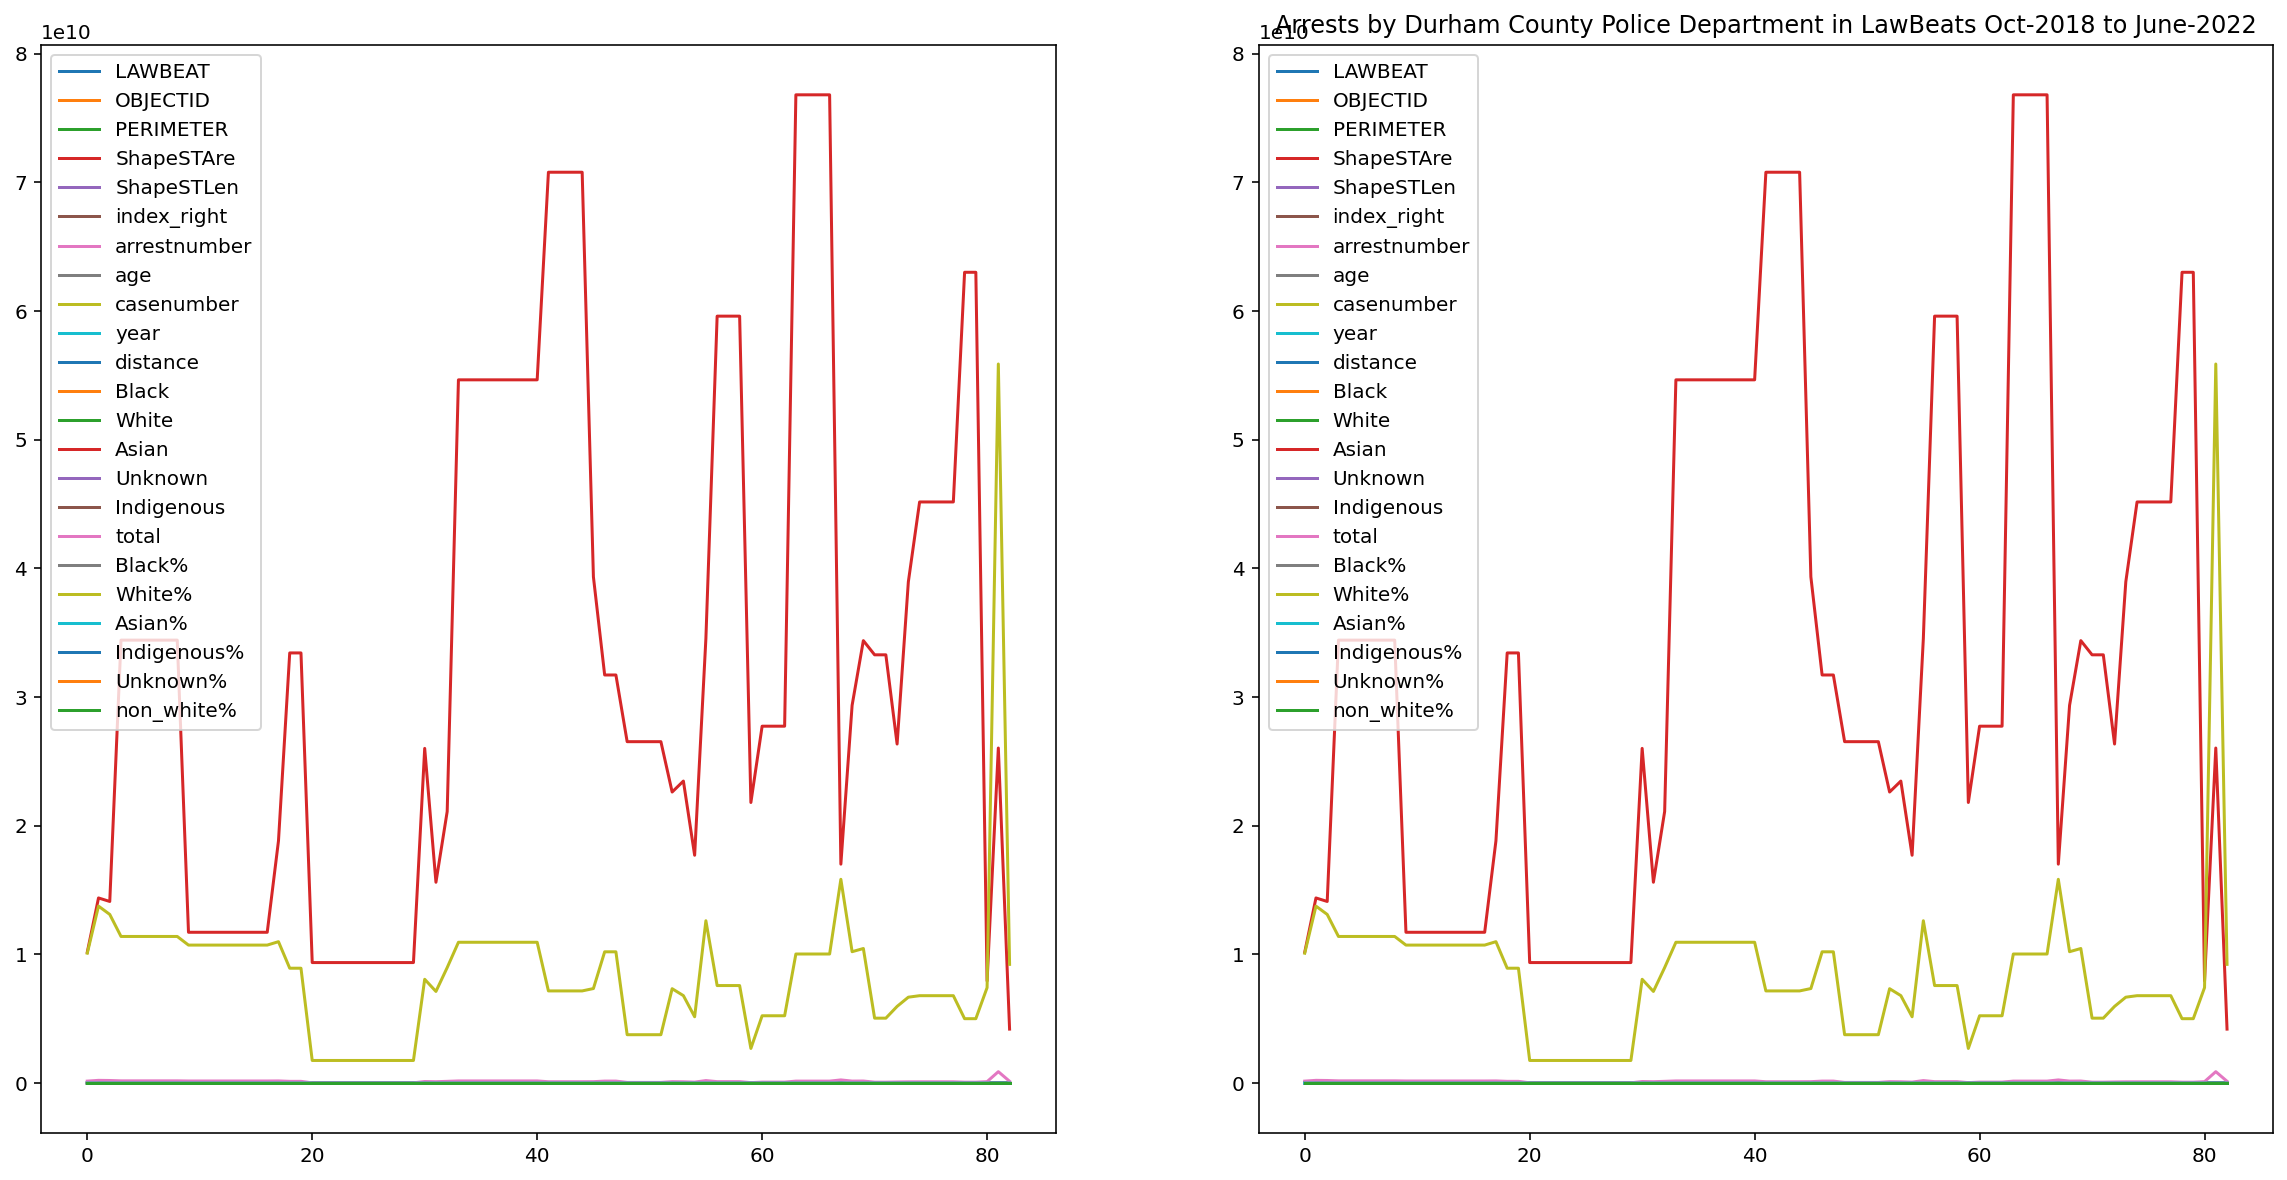

In [12]:
#i dont know whats going on with this plot it was supposed to be a map

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


ax1 = geo_arrest_by_race.plot(legend=True, ax=ax1, column="Black%")

ax2 = geo_arrest_by_race.plot(legend=True, ax=ax2, column="non_white%")
plt.title(
    "Arrests by Durham County Police Department in LawBeats Oct-2018 to June-2022"
)

# conclusion: We will only compare black and white


# Demographics per Census Tract

In [344]:
# load blocks demographic
block_demographic = pd.read_csv(
    "/Users/clarissaache/Documents/Data+/DECENNIALPL2020.P1-2022-06-22T185417.csv"
)
block_demographic = block_demographic.dropna(
    subset=[
        "Total:",
        "Total:!!Population of one race:!!White alone",
        "Total:!!Population of one race:!!Black or African American alone",
    ]
)

block_demographic.head()


,Label (Grouping),Total:,Total:!!Population of one race:,Total:!!Population of one race:!!White alone,Total:!!Population of one race:!!Black or African American alone,Total:!!Population of one race:!!American Indian and Alaska Native alone,Total:!!Population of one race:!!Asian alone,Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,Total:!!Population of one race:!!Some Other Race alone,Total:!!Population of two or more races:,...,Total:!!Population of two or more races:!!Population of four races:!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of five races:,Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race,Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of five races:!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of five races:!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of six races:,Total:!!Population of two or more races:!!Population of six races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race
1,"Block 1000, Block Group 1, Census Tract 1....",108,102,18.0,61,3.0,0.0,0.0,20.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Block 1001, Block Group 1, Census Tract 1....",35,28,13.0,5,0.0,0.0,0.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Block 1002, Block Group 1, Census Tract 1....",38,34,17.0,9,0.0,0.0,0.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"Block 1003, Block Group 1, Census Tract 1....",43,43,21.0,19,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"Block 1004, Block Group 1, Census Tract 1....",31,30,5.0,18,0.0,1.0,0.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [345]:
block_demographic["Total:"] = block_demographic["Total:"].str.replace(",", "")
block_demographic["Total:"] = pd.to_numeric(block_demographic["Total:"])


In [346]:
for j in range(1, len(block_demographic.columns)):
    i = block_demographic.columns[j]

    if block_demographic[i].dtype == "object":
        block_demographic[i] = block_demographic[i].str.replace(",", "")
        block_demographic[i] = pd.to_numeric(block_demographic[i])
    else:
        pass


In [347]:
block_demographic["one_race"] = block_demographic[
    [
        "Total:!!Population of one race:!!White alone",
        "Total:!!Population of one race:!!Black or African American alone",
        "Total:!!Population of one race:!!American Indian and Alaska Native alone",
        "Total:!!Population of one race:!!Asian alone",
        "Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone",
        "Total:!!Population of one race:!!Some Other Race alone",
    ]
].sum(axis=1)

block_demographic["more_than_one_race"] = (
    block_demographic["Total:"] - block_demographic["one_race"]
)
block_demographic["more_than_one_race"].value_counts(normalize=True)
# block_demographic


0.0     0.274658
2.0     0.092529
3.0     0.086914
1.0     0.080811
4.0     0.073975
          ...   
50.0    0.000244
54.0    0.000244
94.0    0.000244
61.0    0.000244
76.0    0.000244
Name: more_than_one_race, Length: 75, dtype: float64

In [348]:
black_races = []
for i in block_demographic:
    if "Black" in i:
        black_races.append(i)

black_races.append("Total:!!Population of two or more races:!!Population of six races:")


In [349]:
block_demographic["any_part_black"] = block_demographic[black_races].sum(axis=1)

block_demographic["poc"] = (
    block_demographic["Total:"]
    - block_demographic["Total:!!Population of one race:!!White alone"]
)
block_demographic["white_only"] = block_demographic[
    "Total:!!Population of one race:!!White alone"
]

block_demographic.head()


,Label (Grouping),Total:,Total:!!Population of one race:,Total:!!Population of one race:!!White alone,Total:!!Population of one race:!!Black or African American alone,Total:!!Population of one race:!!American Indian and Alaska Native alone,Total:!!Population of one race:!!Asian alone,Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,Total:!!Population of one race:!!Some Other Race alone,Total:!!Population of two or more races:,...,Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of five races:!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of five races:!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Total:!!Population of two or more races:!!Population of six races:,Total:!!Population of two or more races:!!Population of six races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,one_race,more_than_one_race,any_part_black,poc,white_only
1,"Block 1000, Block Group 1, Census Tract 1....",108.0,102.0,18.0,61.0,3.0,0.0,0.0,20.0,6.0,...,0.0,0.0,0.0,0.0,0.0,102.0,6.0,64.0,90.0,18.0
3,"Block 1001, Block Group 1, Census Tract 1....",35.0,28.0,13.0,5.0,0.0,0.0,0.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,28.0,7.0,9.0,22.0,13.0
5,"Block 1002, Block Group 1, Census Tract 1....",38.0,34.0,17.0,9.0,0.0,0.0,0.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,34.0,4.0,11.0,21.0,17.0
7,"Block 1003, Block Group 1, Census Tract 1....",43.0,43.0,21.0,19.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.0,0.0,19.0,22.0,21.0
9,"Block 1004, Block Group 1, Census Tract 1....",31.0,30.0,5.0,18.0,0.0,1.0,0.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,30.0,1.0,18.0,26.0,5.0


In [352]:
# extract block number alone
import re

block_num = re.compile(r"Block [0-9]{4}")
block_num2 = re.compile(r"[0-9]{4}")

block_demographic["Block_num"] = 0

for i in range(len(block_demographic["Label (Grouping)"])):
    a = re.findall(block_num, block_demographic.iloc[i, 0])
    block_demographic.iloc[i, -1] = re.findall(block_num2, a[0])[0]


In [291]:
# Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = beats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = beats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
        ##########
        if maxIntersection < 0.1:
            continue
        ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = beats.loc[police_beat_index]["LAWBEAT"]
            matched = True

cblockDurhamBeats = durhamblockmap[durhamblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats["Beat"] = cblockDurhamBeats.index.map(
    lambda ii: cblockIndexToBeat[ii]
)

warnings.filterwarnings("ignore")


In [386]:
cblockDurhamBeats["Block_num"] = cblockDurhamBeats["BLOCKCE20"]
cblockDurhamBeats.sort_values("Block_num")
cblockDurhamBeats

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Beat,block_num,Block_num
3,37,063,002036,2000,370630020362000,Block 2000,G5040,R,None,None,S,286743,3982,+35.9051346,-078.9104302,"POLYGON ((-78.91718 35.90556, -78.91702 35.905...",421,2000,2000
11,37,063,002020,1013,370630020201013,Block 1013,G5040,R,None,None,S,96212,4557,+35.8938510,-078.9448088,"POLYGON ((-78.94746 35.89382, -78.94727 35.893...",324,1013,1013
12,37,063,001712,2001,370630017122001,Block 2001,G5040,R,None,None,S,1274264,49745,+36.0548720,-078.9454010,"POLYGON ((-78.95554 36.05137, -78.95553 36.051...",221,2001,2001
16,37,063,001708,4002,370630017084002,Block 4002,G5040,R,None,None,S,363083,3607,+36.0776513,-078.8796988,"POLYGON ((-78.88862 36.07515, -78.88839 36.075...",224,4002,4002
18,37,063,001801,1025,370630018011025,Block 1025,G5040,R,None,None,S,107654,7350,+36.0128630,-078.8662020,"POLYGON ((-78.86911 36.01263, -78.86898 36.012...",121,1025,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,37,063,002200,2048,370630022002048,Block 2048,G5040,R,None,None,S,10849,0,+35.9949422,-078.8981501,"POLYGON ((-78.89882 35.99520, -78.89875 35.995...",512,2048,2048
4397,37,063,002200,1012,370630022001012,Block 1012,G5040,R,None,None,S,11653,0,+36.0007075,-078.9093748,"POLYGON ((-78.90950 36.00137, -78.90934 36.001...",511,1012,1012
4398,37,063,000700,3016,370630007003016,Block 3016,G5040,R,None,None,S,26136,0,+35.9725240,-078.9247163,"POLYGON ((-78.92578 35.97207, -78.92571 35.972...",415,3016,3016
4399,37,063,002026,2014,370630020262014,Block 2014,G5040,R,None,None,S,73332,0,+35.9492235,-078.8954035,"POLYGON ((-78.89767 35.94758, -78.89762 35.947...",414,2014,2014


In [370]:
demo_beat = pd.merge(
    cblockDurhamBeats[["Block_num", "NAME20", "Beat"]], #block geom
    block_demographic[["any_part_black", "poc", "white_only", "Block_num", "Total:"]],
    on=["Block_num"],
    validate="m:m",
)
demo_beat

,Block_num,NAME20,Beat,any_part_black,poc,white_only,Total:
0,2000,Block 2000,421,536.0,744.0,145.0,889.0
1,2000,Block 2000,421,2.0,6.0,58.0,64.0
2,2000,Block 2000,421,0.0,0.0,0.0,0.0
3,2000,Block 2000,421,15.0,34.0,32.0,66.0
4,2000,Block 2000,421,7.0,16.0,58.0,74.0
...,...,...,...,...,...,...,...
123646,4052,Block 4052,124,22.0,23.0,8.0,31.0
123647,4052,Block 4052,124,0.0,2.0,15.0,17.0
123648,6020,Block 6020,223,13.0,19.0,1.0,20.0
123649,6020,Block 6020,223,5.0,32.0,35.0,67.0


In [391]:
demo_beats = demo_beat[["Beat", "any_part_black", "poc", "white_only", "Block_num", "Total:"]].groupby(by='Beat', as_index=False).sum()
demo_beats['poc+white'] = demo_beats['poc'] + demo_beats['white_only']
demo_beats

,Beat,any_part_black,poc,white_only,Total:,poc+white
0,111,110368.0,175921.0,132972.0,306304.0,308893.0
1,112,80783.0,127532.0,84580.0,210497.0,212112.0
2,113,92042.0,148412.0,110685.0,256153.0,259097.0
3,114,97282.0,152684.0,112517.0,263492.0,265201.0
4,121,97981.0,153995.0,110382.0,261478.0,264377.0
5,122,37895.0,61122.0,43172.0,103118.0,104294.0
6,123,88788.0,137834.0,104024.0,240288.0,241858.0
7,124,106067.0,166551.0,127256.0,290104.0,293807.0
8,211,149282.0,235647.0,167586.0,397873.0,403233.0
9,212,182698.0,290893.0,221475.0,507852.0,512368.0


In [393]:
# get geometry column of the beat
demo_beats_geo = pd.merge(demo_beats, beats[['Beat', 'geometry']], validate='1:m')
demo_beats_geo

,Beat,any_part_black,poc,white_only,Total:,poc+white,geometry
0,111,110368.0,175921.0,132972.0,306304.0,308893.0,"POLYGON ((-78.89039 36.01517, -78.89038 36.015..."
1,112,80783.0,127532.0,84580.0,210497.0,212112.0,"POLYGON ((-78.88787 36.01473, -78.88734 36.014..."
2,113,92042.0,148412.0,110685.0,256153.0,259097.0,"POLYGON ((-78.87372 35.99369, -78.87458 35.991..."
3,114,97282.0,152684.0,112517.0,263492.0,265201.0,"POLYGON ((-78.86954 35.99292, -78.86941 35.992..."
4,114,97282.0,152684.0,112517.0,263492.0,265201.0,"POLYGON ((-78.84601 35.96433, -78.84515 35.964..."
...,...,...,...,...,...,...,...
78,423,191343.0,301711.0,218234.0,513466.0,519945.0,"POLYGON ((-78.83470 35.94601, -78.83466 35.945..."
79,423,191343.0,301711.0,218234.0,513466.0,519945.0,"POLYGON ((-78.80564 35.93008, -78.80575 35.929..."
80,511,94074.0,149124.0,100538.0,246566.0,249662.0,"POLYGON ((-78.92318 36.01031, -78.92260 36.010..."
81,512,34163.0,53393.0,35917.0,87872.0,89310.0,"POLYGON ((-78.90313 36.00376, -78.90298 36.003..."


Text(0.5, 1.0, 'Demographic summary of arrests in each Law Beat')

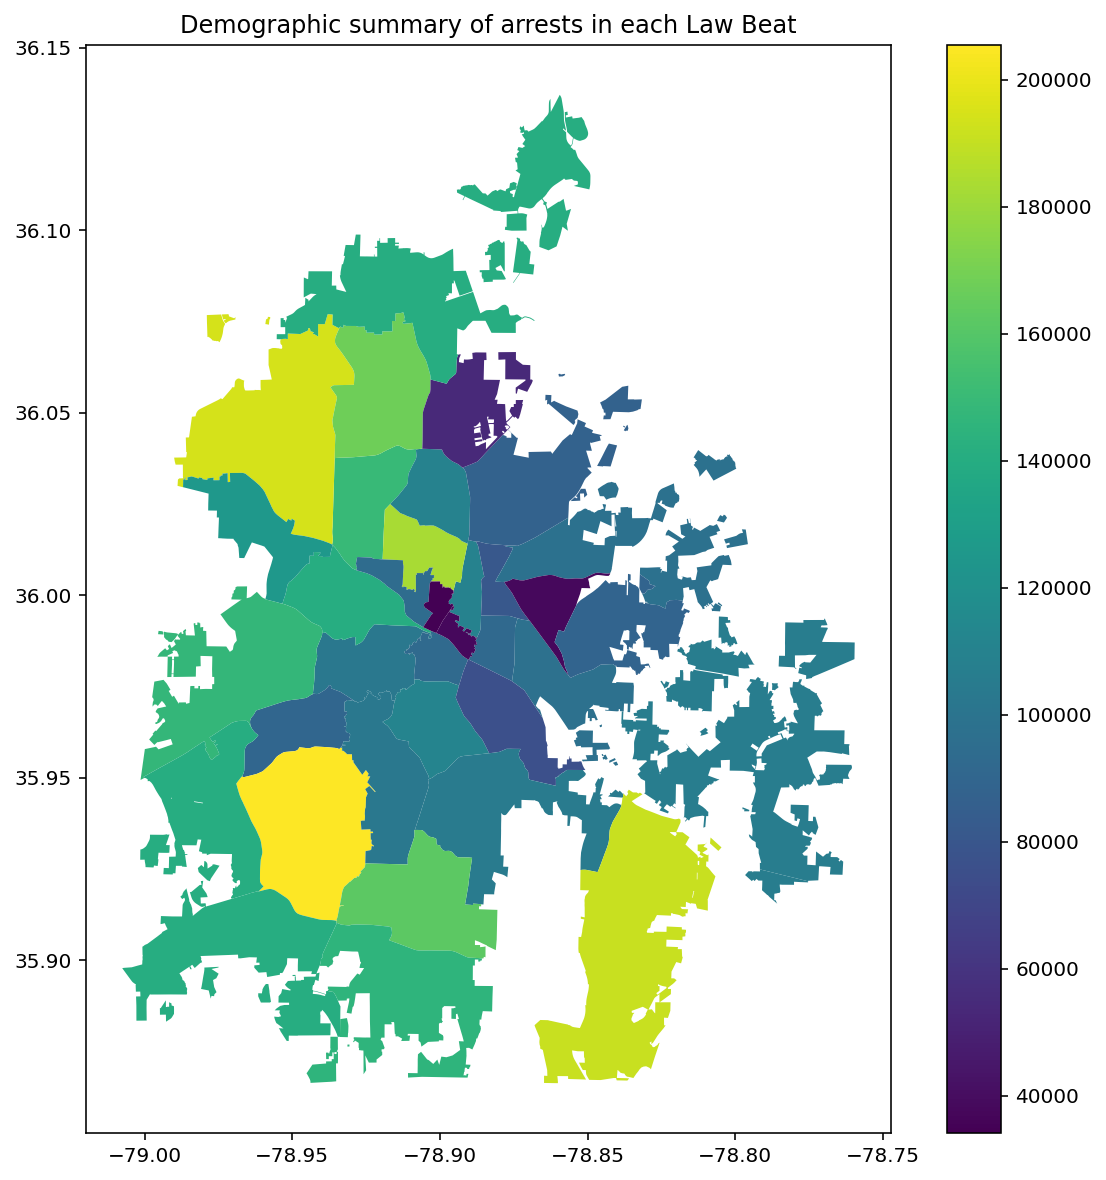

In [402]:
import matplotlib.pyplot as plt

demo_beats_geo = gpd.GeoDataFrame(demo_beats_geo, geometry='geometry', crs = 4326)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
demo_beats_geo.plot(
    ax=ax, column='any_part_black', legend=True
)
plt.title("Demographic summary of arrests in each Law Beat")

In [405]:
demo_beats_geo.to_file('/Users/clarissaache/Documents/Data+/demo_beat_data/demographic_summary_arrests_per_beat.shp')